In [2]:
#importing envirocar

%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

In [4]:
#selecting tracks within a bounding box
bbox = BboxSelector([
    7.601165771484375, # min_x
    51.94807412325402, # min_y
    7.648200988769531, # max_x
    51.97261482608728  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5eec7aa7d6e3cf256ba3effb,2020-06-18T21:49:51,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,1.000000,precision,100.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eec7aa7d6e3cf256ba3effd,2020-06-18T21:49:56,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,0.868047,precision,100.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eec7aa7d6e3cf256ba3effe,2020-06-18T21:50:01,POINT (7.65252 51.95404),0.000000,km/h,16.0,%,1.000000,precision,99.999997,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eec7aa7d6e3cf256ba3efff,2020-06-18T21:50:06,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,0.872764,precision,100.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eec7aa7d6e3cf256ba3f000,2020-06-18T21:50:11,POINT (7.65249 51.95402),2.000000,km/h,16.0,%,1.000000,precision,98.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5dcd0c4444ea856b704c40cc,2019-10-31T14:37:26,POINT (7.63761 51.95630),18.000000,km/h,NaN,NaN,0.700000,precision,109.105019,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,5dcd0c4444ea856b704c40cd,2019-10-31T14:37:31,POINT (7.63768 51.95653),22.887641,km/h,NaN,NaN,0.700000,precision,106.032607,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,5dcd0c4444ea856b704c40ce,2019-10-31T14:37:36,POINT (7.63774 51.95684),24.828686,km/h,NaN,NaN,0.700000,precision,105.397406,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,5dcd0c4444ea856b704c40cf,2019-10-31T14:37:41,POINT (7.63784 51.95723),37.000000,km/h,NaN,NaN,0.710060,precision,108.572160,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#getting the df of 7 tracks that are in our area of interest
some_track_id31 = track_df['track.id'].unique()[31]
track_31 = track_df[track_df['track.id'] == some_track_id31]

some_track_id32 = track_df['track.id'].unique()[32]
track_32 = track_df[track_df['track.id'] == some_track_id32]

some_track_id33 = track_df['track.id'].unique()[33]
track_33 = track_df[track_df['track.id'] == some_track_id33]

some_track_id34 = track_df['track.id'].unique()[34]
track_34 = track_df[track_df['track.id'] == some_track_id34]

some_track_id39 = track_df['track.id'].unique()[39]
track_39 = track_df[track_df['track.id'] == some_track_id39]

some_track_id40 = track_df['track.id'].unique()[40]
track_40 = track_df[track_df['track.id'] == some_track_id40]

some_track_id46 = track_df['track.id'].unique()[46]
track_46 = track_df[track_df['track.id'] == some_track_id46]

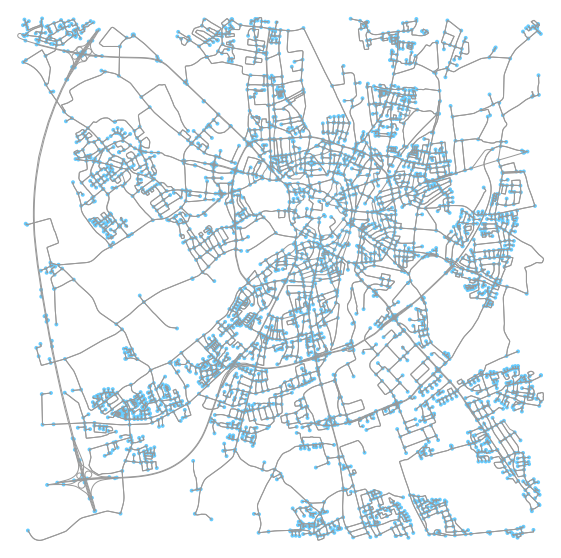

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x215259361c8>)

In [8]:
import numpy as np
import osmnx as ox

lat = 51.950296032982756
lng = 7.615756988525391

# Get the OSM graph of "drive" streets for münster an plot it
graph = ox.graph_from_point((lat, lng), distance=5000, network_type='drive')
ox.plot_graph(graph, fig_height=10, fig_width=10)

In [9]:
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching.matcher.newsonkrumm import NewsonKrummMatcher

# Leuven Map Matching is using a different internal graph structure for the street data. 
# Therefore, the OSMnx graph needs to be transformed to the InMemMap
streetmap = InMemMap("enviroCar", use_latlon=True, use_rtree=True, index_edges=True)

# add nodes
nodes = list(graph.nodes)
for node in nodes:
    lng = graph.nodes[node]['x']
    lat = graph.nodes[node]['y']
    streetmap.add_node(node, (lat, lng))
    

# add edges
edges = list(graph.edges)
for edge in edges:
    node_a, node_b = edge[0], edge[1]
    streetmap.add_edge(node_a, node_b)
    
    # exclude bi-directional edges when street is oneway
    if not graph.edges[edge]['oneway']:
        streetmap.add_edge(node_b, node_a)
    
streetmap.purge()

C:\Users\Microsoft\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Microsoft\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
from leuvenmapmatching.matcher.simple import SimpleMatcher
# Configure the mapmatcher. For increasing the performance it is important 
# that max_dist (in meters) is not set too high
matcher = NewsonKrummMatcher(streetmap,
                          max_dist=100, 
                          max_dist_init=200,
                          obs_noise=100,
                          dist_noise=5,
                          non_emitting_states=False,
                          non_emitting_edgeid=False)

In [11]:
def map_match(track, matcher):
    # Get the latitude and longitude coordinates from the track and join them in an array
    lats = list(track['geometry'].apply(lambda coord: coord.y))
    lngs = list(track['geometry'].apply(lambda coord: coord.x))
    
    #joining in an array
    track_coords = [c for c in zip(lats, lngs)]
    
    #performing map matching
    edge_ids, last_idx = matcher.match(track_coords)
    
    # get the coordinates of the "best" mapmatched route
    coords = [m.edge_m.pi[:] for m in matcher.lattice_best]
    
    #for comparing with osm edge df, key value 0 is added
    i = 0
    edg = []
    for edge in edge_ids:
        index = edge_ids[i]
        tup = list(index)
        tup.append(0)
        ed = tuple(tup)
        edg.append(ed)
        i = i+1
    #adding edge list and map matched coordinates to the track df    
    track['Edge'] = edg
    track['MM_Coords'] = coords
    

In [12]:
#runnning map matching for each tracks
Tracks_list = [track_31, track_32, track_33, track_34, track_39, track_40, track_46]
for i in Tracks_list:
    map_match(i,matcher)  
    
#combining the df of the tracks, after performing map matching
tracks = pd.concat([track_31, track_32, track_33, track_34, track_39, track_40, track_46], ignore_index=True)
tracks

C:\Users\Microsoft\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Microsoft\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Microsoft\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Edge,MM_Coords
0,5de9d7a03bdb691868e765cf,2019-11-27T14:56:33,POINT (7.65039 51.94099),0.000000,km/h,13.000000,%,1.212573,precision,92.221026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94162607645247, 7.6508964156561055)"
1,5de9d7a03bdb691868e765d1,2019-11-27T14:56:38,POINT (7.65039 51.94099),0.000000,km/h,13.336957,%,1.000000,precision,93.178808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94162666536771, 7.650894440938618)"
2,5de9d7a03bdb691868e765d2,2019-11-27T14:56:43,POINT (7.65036 51.94100),9.135514,km/h,18.098877,%,1.000000,precision,95.268083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94163674597954, 7.6508606391715075)"
3,5de9d7a03bdb691868e765d3,2019-11-27T14:56:48,POINT (7.65004 51.94121),36.277108,km/h,20.248292,%,1.042262,precision,95.467452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94175269353321, 7.650471846625076)"
4,5de9d7a03bdb691868e765d4,2019-11-27T14:56:53,POINT (7.64947 51.94158),47.240175,km/h,16.918660,%,1.033501,precision,95.101802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94196217101947, 7.64976941577681)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,5dd68ae544ea856b70e135f5,2019-11-18T08:28:53,POINT (7.65511 51.93745),52.999998,km/h,16.114791,%,1.299901,precision,97.760399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.93744505064686, 7.655110098982098)"
1350,5dd68ae544ea856b70e135f6,2019-11-18T08:28:58,POINT (7.65579 51.93697),47.883782,km/h,13.000000,%,1.286282,precision,97.637421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.9369784987003, 7.655813095369233)"
1351,5dd68ae544ea856b70e135f7,2019-11-18T08:29:03,POINT (7.65634 51.93661),29.844875,km/h,13.000000,%,1.506910,precision,97.652662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.93661737448661, 7.656357219802496)"
1352,5dd68ae544ea856b70e135f8,2019-11-18T08:29:08,POINT (7.65630 51.93626),34.432693,km/h,21.234414,%,1.577233,precision,97.750596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(56146307, 262704083, 0)","(51.93625383540167, 7.656309248922576)"


In [13]:
import folium

lat = 51.950296032982756
lng = 7.615756988525391

m = folium.Map(location=[lat, lng], zoom_start=13)
Tracks_list = [track_31, track_32, track_33, track_34, track_39, track_40, track_46]
for i in Tracks_list:
    lats = list(i['geometry'].apply(lambda coord: coord.y))
    lngs = list(i['geometry'].apply(lambda coord: coord.x))
    #joining in an array
    track_coords = [c for c in zip(lats, lngs)]

    # plotting both raw and mapmatched track
    # blue=map matched track
    # red=raw track
    folium.PolyLine(i['MM_Coords'], color='blue').add_to(m)
    folium.PolyLine(track_coords, color='red').add_to(m)
m

In [14]:
lat = []
long = []
for i in tracks['MM_Coords']:
    li = list(i)
    lat.append(li[0])
    long.append(li[1])
tracks['Latitude'] = lat
tracks['Longitude'] = long
tracks.to_csv('C:/Users/sindh/Documents/GitHub/tracks_concat.csv')
tracks

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sindh/Documents/GitHub/tracks_concat.csv'

In [15]:
#checking the column values in osm df
tracksdf_osm = ox.graph_to_gdfs(graph, nodes=False, edges=True)
tracksdf_osm.columns

Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'maxspeed', 'oneway',
       'length', 'geometry', 'lanes', 'ref', 'bridge', 'tunnel', 'service',
       'access', 'width', 'junction', 'area'],
      dtype='object')

In [16]:
edg = tracks['Edge']

#empty list to append edge[0] and edge[1] as u and v as in the osm df
v =[]
u=[]
for edge in edg:
    uu = edge[0]
    vv = edge[1]
    u.append(uu)
    v.append(vv)
    
tracks['u']=u
tracks['v']=v
tracks

,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Edge,MM_Coords,Latitude,Longitude,u,v
0,5de9d7a03bdb691868e765cf,2019-11-27T14:56:33,POINT (7.65039 51.94099),0.000000,km/h,13.000000,%,1.212573,precision,92.221026,...,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94162607645247, 7.6508964156561055)",51.941626,7.650896,1611622417,4017092106
1,5de9d7a03bdb691868e765d1,2019-11-27T14:56:38,POINT (7.65039 51.94099),0.000000,km/h,13.336957,%,1.000000,precision,93.178808,...,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94162666536771, 7.650894440938618)",51.941627,7.650894,1611622417,4017092106
2,5de9d7a03bdb691868e765d2,2019-11-27T14:56:43,POINT (7.65036 51.94100),9.135514,km/h,18.098877,%,1.000000,precision,95.268083,...,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94163674597954, 7.6508606391715075)",51.941637,7.650861,1611622417,4017092106
3,5de9d7a03bdb691868e765d3,2019-11-27T14:56:48,POINT (7.65004 51.94121),36.277108,km/h,20.248292,%,1.042262,precision,95.467452,...,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94175269353321, 7.650471846625076)",51.941753,7.650472,1611622417,4017092106
4,5de9d7a03bdb691868e765d4,2019-11-27T14:56:53,POINT (7.64947 51.94158),47.240175,km/h,16.918660,%,1.033501,precision,95.101802,...,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94196217101947, 7.64976941577681)",51.941962,7.649769,1611622417,4017092106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,5dd68ae544ea856b70e135f5,2019-11-18T08:28:53,POINT (7.65511 51.93745),52.999998,km/h,16.114791,%,1.299901,precision,97.760399,...,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.93744505064686, 7.655110098982098)",51.937445,7.655110,56146299,56146307
1350,5dd68ae544ea856b70e135f6,2019-11-18T08:28:58,POINT (7.65579 51.93697),47.883782,km/h,13.000000,%,1.286282,precision,97.637421,...,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.9369784987003, 7.655813095369233)",51.936978,7.655813,56146299,56146307
1351,5dd68ae544ea856b70e135f7,2019-11-18T08:29:03,POINT (7.65634 51.93661),29.844875,km/h,13.000000,%,1.506910,precision,97.652662,...,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.93661737448661, 7.656357219802496)",51.936617,7.656357,56146299,56146307
1352,5dd68ae544ea856b70e135f8,2019-11-18T08:29:08,POINT (7.65630 51.93626),34.432693,km/h,21.234414,%,1.577233,precision,97.750596,...,NaN,NaN,NaN,NaN,"(56146307, 262704083, 0)","(51.93625383540167, 7.656309248922576)",51.936254,7.656309,56146307,262704083


In [17]:
df_with_maxspeed=tracksdf_osm.loc[0:,["u","v","maxspeed"]]
final_df=pd.merge(df_with_maxspeed,tracks, on=['u','v'], how='inner')
final_df

,u,v,maxspeed,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,...,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Edge,MM_Coords,Latitude,Longitude
0,256786473,461933484,50,5dda4b8144ea856b70e66875,2019-11-22T15:26:54,POINT (7.60999 51.94918),46.999999,km/h,18.000001,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(256786473, 461933484, 0)","(51.94913128044155, 7.610003071458533)",51.949131,7.610003
1,256786473,461933484,50,5dda4b8144ea856b70e66876,2019-11-22T15:26:59,POINT (7.60903 51.94905),47.000001,km/h,14.000000,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(256786473, 461933484, 0)","(51.94900177886346, 7.609049485087851)",51.949002,7.609049
2,256786473,461933484,50,5dda4b8144ea856b70e66877,2019-11-22T15:27:04,POINT (7.60811 51.94893),45.853006,km/h,13.693631,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(256786473, 461933484, 0)","(51.94887731426239, 7.608133047195886)",51.948877,7.608133
3,256786473,461933484,50,5dd68aef44ea856b70e1411a,2019-11-19T15:09:14,POINT (7.61003 51.94919),34.999999,km/h,14.363845,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(256786473, 461933484, 0)","(51.94913729240689, 7.610047342146637)",51.949137,7.610047
4,256786473,461933484,50,5dd68aef44ea856b70e1411b,2019-11-19T15:09:19,POINT (7.60933 51.94909),37.922636,km/h,17.573487,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(256786473, 461933484, 0)","(51.94904206607974, 7.609346133803539)",51.949042,7.609346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,249740752,58707648,50,5dd68aef44ea856b70e1416c,2019-11-19T15:16:08,POINT (7.59506 51.96504),7.959017,km/h,24.184358,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(249740752, 58707648, 0)","(51.965017735226716, 7.595052685658841)",51.965018,7.595053
1350,249740752,58707648,50,5dd68aef44ea856b70e1416d,2019-11-19T15:16:13,POINT (7.59470 51.96507),23.941606,km/h,21.763818,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(249740752, 58707648, 0)","(51.96503632105766, 7.594696224492471)",51.965036,7.594696
1351,2705735628,278156525,50,5de9d7a03bdb691868e765d6,2019-11-27T14:57:03,POINT (7.64822 51.94251),45.000001,km/h,13.000000,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(2705735628, 278156525, 0)","(51.9430735, 7.6477778)",51.943073,7.647778
1352,2705735628,278156525,50,5ddcdd4a44ea85025cfdf87e,2019-11-25T16:13:49,POINT (7.64769 51.94310),35.000001,km/h,13.000000,%,...,NaN,NaN,NaN,NaN,NaN,NaN,"(2705735628, 278156525, 0)","(51.9431178603529, 7.647735396234544)",51.943118,7.647735


In [18]:
i=final_df['Edge'].unique()
count=0

#no of segments where avgspeed exceeds maxspeed
for edge in i:
    s = final_df[(final_df['Edge'] == edge)]['Speed.value'].mean()
    m = final_df[(final_df['Edge'] == edge)]['maxspeed'].unique()
    mm=float(m)
    if s > mm:
            count= count+1
            print(edge)
count

(277727447, 277727537, 0)
(277727537, 3040876260, 0)
(302697586, 254321187, 0)
(302697589, 254321187, 0)
(268586744, 268586745, 0)
(58707768, 5018556910, 0)
(3040876260, 457078376, 0)
(56155689, 56155696, 0)
(277896932, 277898391, 0)
(277896935, 277896932, 0)
(254321187, 302697589, 0)
(254321187, 302697586, 0)
(277898391, 34939492, 0)
(54781720, 302697589, 0)
(304637903, 34924748, 0)
(304637903, 303364981, 0)
(34924748, 34924790, 0)
(34924748, 304637903, 0)
(34924790, 34924748, 0)
(457078376, 2630136769, 0)
(303364981, 304637903, 0)


21

In [19]:
#average speed of tracks
def avg_speed(edge):
    speed = final_df[(final_df['Edge'] == edge)]['Speed.value'].mean()
    print('The average speed for the edge {} is {}'.format(edge,speed))
    
#no of stops    
def no_of_stops(edge):
    count = 0
    track_id= final_df['track.id']
    track= final_df[(final_df['Edge'] == edge)]
    list_of_speedS = list(track['Speed.value'])

    for i in range(len(list_of_speedS)):
        if i!=0 and list_of_speedS[i]<5:
            if list_of_speedS[i-1]<5:
                if track_id[i]==track_id[i-1]:
                    count=count
                else:
                    count=count+1
            elif list_of_speedS[i-1]>=5:
                count=count+1              
        elif i==0 and list_of_speedS[i]<5:
            count=count+1
        else:
            continue
    print(f'The number of cars stops in this segment is {count}')

#cars waiting(stopped car) in the segment
def no_of_waiting_cars(edge):
    uniq = final_df[(final_df['Edge'] == edge)]
    uniq1= uniq[(uniq['Speed.value'] < 5)]['track.id'].unique()
    num1 = len(uniq1)
    print("No.of waiting cars:{}".format(num1)) 
    
#no.of.cars.passing.the.segment
def no_of_cars_passing(edge):
    no_of_cars = final_df[(final_df['Edge'] == edge)]['track.id'].unique()
    no = len(no_of_cars)
    print('NUmber of car traversing the {} is {}'.format(edge,no))
#maxspeed exceedance
def speed_limit(edge):
    speed_avg = final_df[(final_df['Edge'] == edge)]['Speed.value'].mean()
    max_speed = final_df[(final_df['Edge'] == edge)]['maxspeed'].unique()
    maxspeed=float(max_speed)
    if speed_avg > maxspeed:
        exceed = speed_avg-maxspeed
        print("The average speed of the segment exceeds the allowed speed by {} km/hr".format(exceed))
    else:
        print("The average speed of the segment does not exceeds the allowed speed")

In [20]:
 edgeid=tracks['Edge'].unique()

In [21]:
if __name__ == '__main__':
    print("The average speed:")
    average_speed = avg_speed((34924790, 34924748, 0))
    no_stops = no_of_stops((427878668, 427878657, 0))
    no_of_wairingcar = no_of_waiting_cars((34924790, 34924748, 0))
    no_of_cartransverse = no_of_cars_passing((34924790, 34924748, 0))
    exceedance = speed_limit((34924790, 34924748, 0))

The average speed:
The average speed for the edge (34924790, 34924748, 0) is 53.59529188235294
The number of cars stops in this segment is 3
No.of waiting cars:0
NUmber of car traversing the (34924790, 34924748, 0) is 3
The average speed of the segment exceeds the allowed speed by 3.5952918823529387 km/hr


In [ ]:
#shapefile package:phshp
import shapefile

#reading the remapped file
sf = shapefile.Reader("c:/Users/sindh/Documents/GitHub/envirocar-py-master/examples/Remap_geom.shp")
sf
fields = [x[0] for x in sf.fields][1:]
records = sf.records()
shps = [s.points for s in sf.shapes()]
#write into a dataframe
df = pd.DataFrame(columns=fields, data=records)
df




In [57]:
edge_df= pd.DataFrame(edgeid, columns = ["Edgeid"])
edge_df

,Edgeid
0,"(1611622417, 4017092106, 0)"
1,"(4017092106, 2705735628, 0)"
2,"(2705735628, 278156525, 0)"
3,"(278156525, 278156529, 0)"
4,"(278156529, 278156537, 0)"
...,...
117,"(256786473, 461933484, 0)"
118,"(461933484, 33846185, 0)"
119,"(925611090, 427878668, 0)"
120,"(427878668, 427878657, 0)"


In [54]:
#adding values for each unique edge
avg_speed=[]
no_wcars=[]
no_tcars=[]
no_stops=[]
ex_speed=[]

for edge in edgeid:
    #average speed value 
    speed = final_df[(final_df['Edge'] == edge)]['Speed.value'].mean()
    avg_speed.append(speed)
    
    #no of waiting cars
    uniq = final_df[(final_df['Edge'] == edge)]
    uniq1= uniq[(uniq['Speed.value'] < 5)]['track.id'].unique()
    num1 = len(uniq1)
    no_wcars.append(num1)
    
    #no of transversing cars 
    no_of_cars = final_df[(final_df['Edge'] == edge)]['track.id'].unique()
    no = len(no_of_cars)
    no_tcars.append(no)
    
    #noof stops
    count = 0
    track_id= final_df['track.id']
    track= final_df[(final_df['Edge'] == edge)]
    list_of_speedS = list(track['Speed.value'])

    for i in range(len(list_of_speedS)):
        if i!=0 and list_of_speedS[i]<5:
            if list_of_speedS[i-1]<5:
                if track_id[i]==track_id[i-1]:
                    count=count
                else:
                    count=count+1
            elif list_of_speedS[i-1]>=5:
                count=count+1              
        elif i==0 and list_of_speedS[i]<5:
            count=count+1
        else:
            continue
    no_stops.append(count)
    
    #exceeding speed
    exceed=0
    speed_avg = final_df[(final_df['Edge'] == edge)]['Speed.value'].mean()
    max_speed = final_df[(final_df['Edge'] == edge)]['maxspeed'].unique()
    maxspeed=float(max_speed)
    if speed_avg > maxspeed:
        exceed = speed_avg-maxspeed
    ex_speed.append(exceed)
    
    
    
ex_speed



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7.5853015,
 1.743935666666669,
 0,
 0,
 0.5010021000000009,
 0.6454549999999983,
 3.13136291666666,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2.0,
 0,
 0,
 0,
 0,
 1.8760353999999992,
 0,
 0,
 3.5952918823529387,
 3.342811428571437,
 2.542591999999992,
 0,
 1.4736088800000005,
 10.519230666666665,
 13.194003666666667,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.2826711176470553,
 3.019317571428573,
 1.3204769999999968,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.377264799999999,
 0,
 0,
 0,
 4.0,
 0.5000004999999987,
 2.9072575,
 3.000002000000002,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [58]:
#adding each values as columns for edge dataframe 
edge_df["average_speed"]=avg_speed
edge_df['wating_cars']=no_wcars
edge_df['transversing_cars']=no_tcars
edge_df['no_of_stops']=no_stops
edge_df['exceeding_speed']=ex_speed
edge_df


,Edgeid,average_speed,wating_cars,transversing_cars,no_of_stops,exceeding_speed
0,"(1611622417, 4017092106, 0)",18.530559,1,1,1,0.0
1,"(4017092106, 2705735628, 0)",21.026199,2,3,2,0.0
2,"(2705735628, 278156525, 0)",35.036521,0,3,0,0.0
3,"(278156525, 278156529, 0)",34.000000,0,3,0,0.0
4,"(278156529, 278156537, 0)",29.355346,0,3,0,0.0
...,...,...,...,...,...,...
117,"(256786473, 461933484, 0)",42.647792,0,2,0,0.0
118,"(461933484, 33846185, 0)",10.730667,1,2,7,0.0
119,"(925611090, 427878668, 0)",24.766381,0,1,0,0.0
120,"(427878668, 427878657, 0)",0.000000,1,1,3,0.0
